In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.metrics import mean_squared_error

C:\Users\Hitesh\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Hitesh\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Hitesh\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df=pd.read_csv("50startup.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# checking missing values

In [3]:
df.isnull().sum()    # there is no any missing values in our dataset

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

# Exploratory data analysis

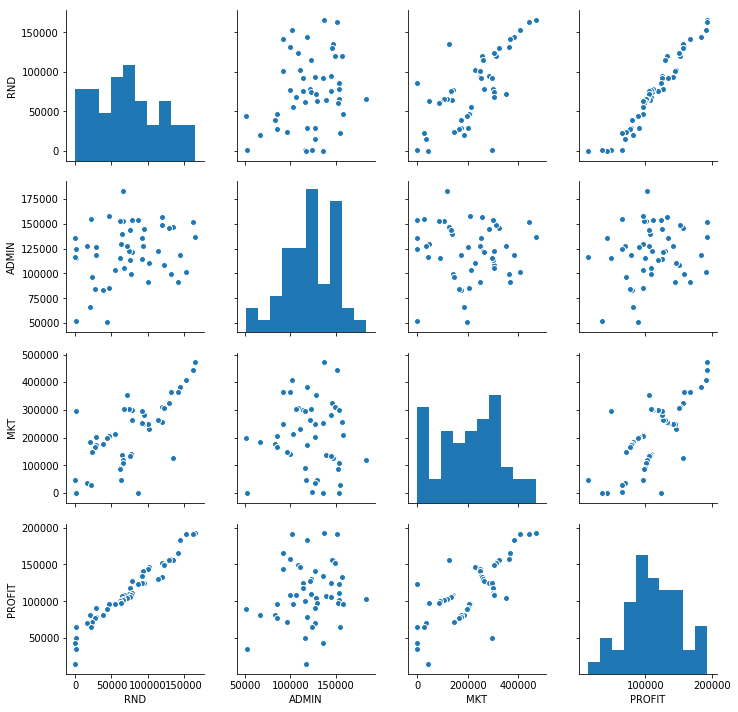

In [4]:
sb.pairplot(df)

In [5]:
df.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


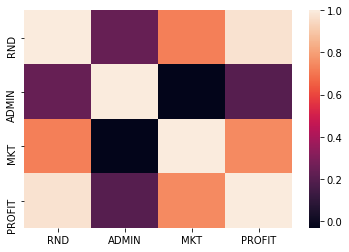

In [8]:
sb.heatmap(df.corr())

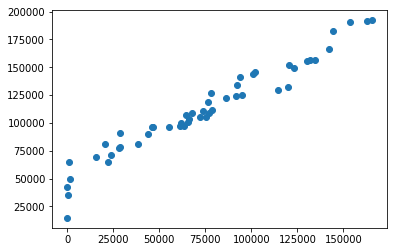

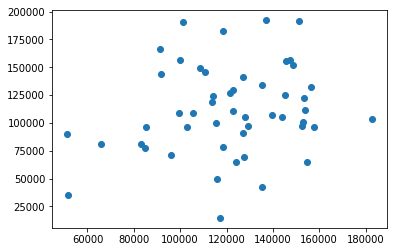

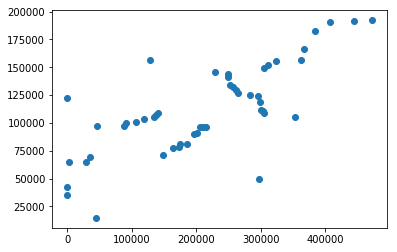

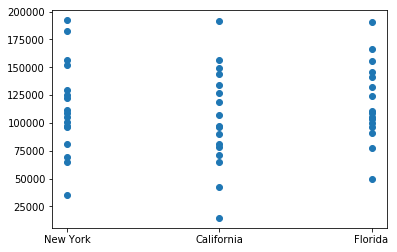

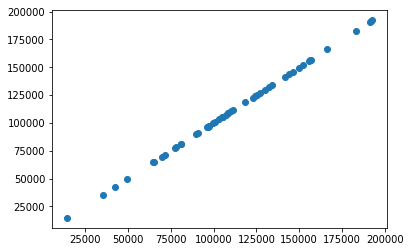

In [10]:
for i in df.columns:
    plt.scatter(df[i],df["PROFIT"])
    plt.show()

In [38]:
X=df[["RND","MKT"]]
Y=df[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

We Use linear Regression because there is a linear relation between RND and MKT variables with Profit variable

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [40]:
RMSE=np.sqrt(mean_squared_error(ytest,pred))

In [41]:
RMSE

7193.744561562096

# Regularization

In [42]:
q=[]
for i in range(1,100):
    q.append(i*0.01)
from sklearn.linear_model import Lasso
ls=Lasso()
tp={"alpha":q}
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(ls,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)

In [43]:
cvmodel.best_params_

{'alpha': 0.89}

In [44]:
ls=Lasso(cvmodel.best_params_["alpha"])
model=ls.fit(xtrain,ytrain)
ls_pred=model.predict(xtest)

In [45]:
RMSE_ls=np.sqrt(mean_squared_error(ytest,ls_pred))

In [46]:
RMSE_ls

7193.744541145458